# <center> Éléments de correction du sujet Mines-Ponts 2019 Informatique commune

### Q1

In [1]:
from math import log,sqrt,floor,ceil
print(log(0.5))

-0.6931471805599453


### Q2

In [2]:
def sont_proches(x,y):
    atol=1e-5
    rtol=1e-8
    return abs(x-y)<=atol+abs(y)*rtol

### Q3

mystere(1001,10) renvoie 3 :

In [3]:
def mystere(x,b):
    if x<b:
        return 0
    else:
        return 1+mystere(x/b,b)

In [4]:
mystere(1001,10)

3

### Q4

mystere(x,b) renvoie $\lfloor \log_b(x)\rfloor$.

### Q5

In [5]:
pas=1e-5

x2=0
for i in range(100000):
    x1=(i+1)*pas
    x2=x2+pas
print("x1:", x1)
print("x2:", x2)

x1: 1.0
x2: 0.9999999999980838


L'écriture binaire de $10^{-5}$ est (mathématiquement) infinie, donc sa représentation en flottant est arrondie. Puisque calculer $x_2$ nécessite $100000$ additions, les erreurs d'arrondi s'accumulent et le résultat obtenu pour $x_2$ n'est pas exactement $1$. Pour $x_1$, seule une opération est effectuée (la multiplication dans la dernière itération de la boucle), et le calcul est effectué avec la précision machine.

### Q6

Puisque 32 bits correspondent à 4 octets et qu'un Go correspond à $10^9$ octets, on peut stocker, sur une clef de 4Go, une liste de taille maximale $10^9$.

### Q7

En codant les booléens sur 1 bit, on gagne un facteur 32.

En réalité, pour de nombreuses architectures, l'octet est la plus petite unité adressable, donc la taille minimale d'un booléen serait alors d'un octet, et dans ce cas, on gagnerait un facteur 4.

### Q8

In [6]:
def erato_iter(N):
    liste_bool=N*[True]
    liste_bool[0]=False
    for i in range(2,int(sqrt(N))+1):
        if liste_bool[i-1]:
            for k in range(2,N//i+1):
                liste_bool[k*i-1]=False
    return liste_bool

In [7]:
erato_iter(12)

[False, True, True, False, True, False, True, False, False, False, True, False]

En fait, le int(sqrt(N)) dans la boucle for peut amener à une erreur d'arrondi, et on utilise plutôt d'habitude une version comme la suivante (mais ce n'était pas demandé dans l'énoncé) :

In [8]:
def erato_iter(N):
    liste_bool=N*[True]
    liste_bool[0]=False
    i=2
    while i**2<=N:
        if liste_bool[i-1]:
            for k in range(2,N//i+1):
                liste_bool[k*i-1]=False
        i+=1
    return liste_bool

In [9]:
erato_iter(12)

[False, True, True, False, True, False, True, False, False, False, True, False]

### Q9

Pour chaque nombre premier $p\leqslant \sqrt N$, on marque comme Faux ses multiples (distincts de lui-même), qui sont au nombre de $\lfloor\frac{N}{p}\rfloor-1$. Cela coûte alors :
$\displaystyle \sum_{\textrm{$p$ premier, $p\leqslant \sqrt N$}} \left\lfloor\frac{N}{p}\right\rfloor-1$ affectations, ce qui est de l'ordre de $N\times\!\!\!\!\!\!\!\!\!\!\!\!\displaystyle \sum_{\textrm{$p$ premier, $p\leqslant \sqrt N$}} \frac{1}{p} \sim N\ln \ln (\sqrt N) = O\big(N\ln \ln N\big)$.

Les affectations lors de l'initialisation se font en $O(N)$, ce qui ne change pas l'ordre de grandeur précédent.

### Q10

On travaille en base 10. On a alors, si $n$ est le nombre de chiffres de $N$, $n=\lfloor\log_{10}(N)\rfloor+1$, et l'on obtient alors que la complexité précédente est en $O\left(10^n \ln n\right)$.

### Q11

Si $x_i$ est impair à chaque itération, on obtient $\displaystyle A=\sum\limits_{i=1}^{N-1}2^i = 2^N-2$.

L'énoncé n'est pas tout à fait clair sur le traitement du cas $i=0$, on peut aussi raisonnablement répondre $\displaystyle A=\sum\limits_{i=0}^{N-1}2^i = 2^N-1$.

### Q12

In [10]:
from time import time
def bbs(N):
    p1=24375763
    p2=28972763
    M=p1*p2
    t=time()
    xi=(t-int(t))*1e7
    xi=int(xi)
    A=0
    for i in range(N):
        if xi%2==1:
            A=A+2**i
        xi=(xi**2)%M
    return A

In [11]:
bbs(43)

4807912924063

### Q13

Attention : le résultat renvoyé par bbs(N) peut valoir au maximum $2^N-1$.

Or $n_\max=2^N-1 \iff N=\log_2(n_\max+1)$, ce qui explique l'initialisation dans la fonction suivante :

In [12]:
def test_fermat(p):
    # le test de Fermat impose que p soit supérieur à 7
    return p>7 and 2**(p-1)%p==1 and 3**(p-1)%p==1 and 5**(p-1)%p==1 and 7**(p-1)%p==1

def premier_rapide(n_max):
    N=int(log(n_max+1,2))
    p=bbs(N)
    while not(test_fermat(p)):
        p=bbs(N)
    return p

In [13]:
premier_rapide(1e6)

182687

Il aurait été préférable (mais hors-programme) d'utiliser l'exponentiation rapide modulaire, à l'aide de la fonction pow :

In [14]:
def test_fermat2(p):
    return p>7 and pow(2,p-1,p)==1 and pow(3,p-1,p)==1 and pow(5,p-1,p)==1 and pow(7,p-1,p)==1

def premier_rapide2(n_max):
    N=floor(log(n_max+1,2))
    p=bbs(N)
    while not(test_fermat2(p)):
        p=bbs(N)
    return p

In [15]:
t=time()
premier_rapide(1e7)
print(time()-t)

2.983994960784912


In [16]:
t=time()
premier_rapide2(1e7)
print(time()-t)

0.0003809928894042969


### Q14

In [17]:
def stats_bbs_fermat(N,nb):
    err=[]
    premier=erato_iter(N)
    for i in range(nb):
        p=premier_rapide(N)
        if not premier[p-1]:
            err.append(p)
    return len(err)/nb,err

In [18]:
stats_bbs_fermat(100000,1000)

(0.0, [])

Waouh !

### Q15

In [19]:
def Pi(N):
    liste_bool=erato_iter(N)
    P=[]
    pi=0
    for n in range(N):
        if liste_bool[n]:
            pi+=1
        P.append([n+1,pi])
    return P

In [20]:
Pi(6)

[[1, 0], [2, 1], [3, 2], [4, 2], [5, 3], [6, 3]]

### Q16

In [21]:
def verif_Pi(N):
    P=Pi(N)
    for n in range(5393,N+1):
        if n/(log(n)-1)>=P[n-1][1]: # attention au décalage d'indice
            return False
    return True

In [22]:
verif_Pi(10000)

True

### Q17

Si $n=\frac{b-a}{\textrm{pas}}$ est le nombre de subdivisions de l'intervalle d'intégration $[a,b]$, la méthode des rectangles à droite possède une complexité linéaire, en $O(n)$ opérations (additions, multiplications et appels à la fonction à intégrer, qui sont supposés à coût constant).

### Q18

Dans les mêmes conditions d'évaluation, la méthode des rectangles centrés (dite aussi "du point-milieu") et la méthode des trapèzes possèdent également chacune une complexité linéaire, en $O(n)$.

### Q19

In [23]:
def inv_ln_rect_d(a,b,pas):
    s=0
    n=int((b-a)/pas)
    for i in range(n):
        s+=1/log(a+(i+1)*pas) # attention de bien prendre les rectangles à droite !
    return pas*s

### Q20

In [24]:
def li_d(x,pas):
    if x==1:
        return -float("inf")
    elif x<1:
        return inv_ln_rect_d(0,x,pas)
    else:
        return inv_ln_rect_d(0,1-pas,pas)+inv_ln_rect_d(1+pas,x,pas)

Cela n'est pas demandé dans l'énoncé, mais on peut essayer de retrouver les courbes affichées :

<IPython.core.display.Javascript object>


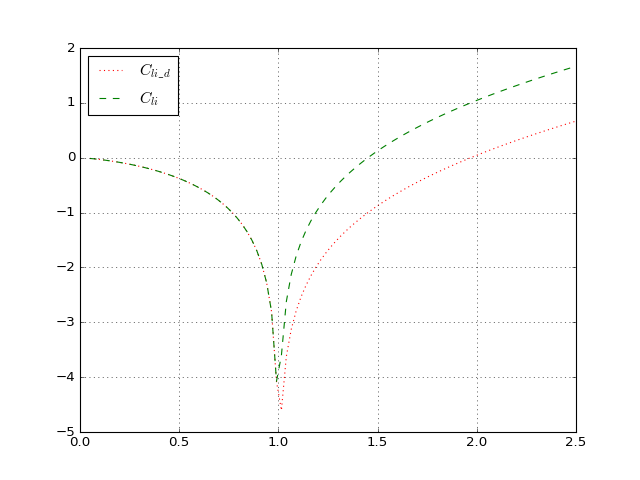

<IPython.core.display.Javascript object>


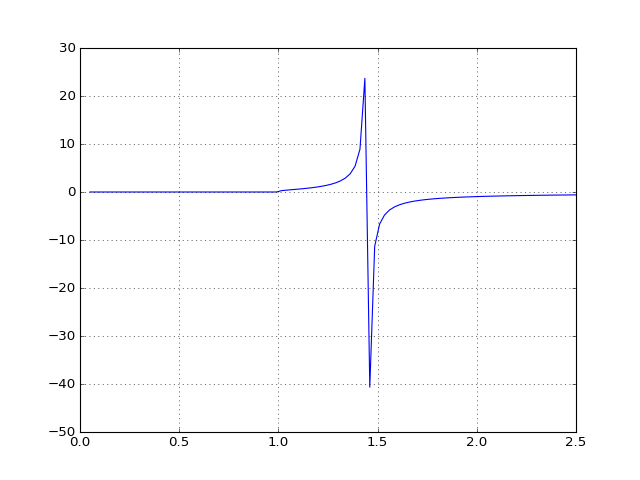

<IPython.core.display.Javascript object>


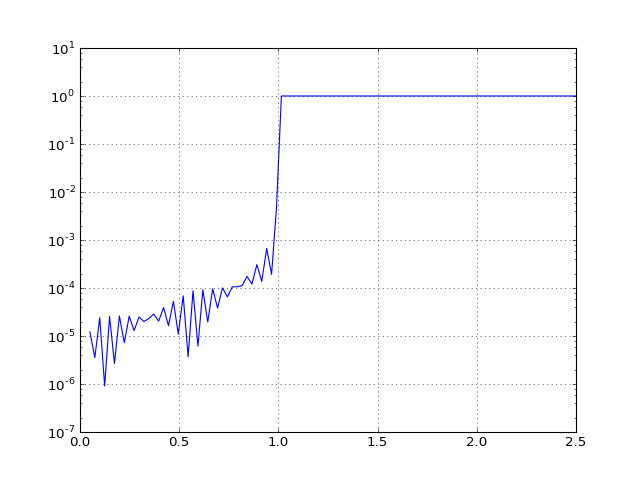

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpmath import li # c'est la fonction ref_li de l'énoncé

X=np.linspace(0.05,2.5,100)
Y=[li_d(x,1e-4) for x in X]
Yth=[li(x) for x in X]

plt.figure("tracé de li_d")
plt.grid(True)
plt.plot(X,Y,":r",label=r'$C_{li\_d}$')
plt.plot(X,Yth,"--g",label=r'$C_{li}$')
plt.legend(loc='upper left')
plt.show()

Reld=[(Y[i]-Yth[i])/Yth[i] for i in range(len(Yth))]
plt.figure("tracé de l'erreur relative")
plt.grid(True)
plt.plot(X,Reld)
plt.show()

Absd=[abs(Y[i]-Yth[i]) for i in range(len(Yth))]
plt.figure("tracé de l'erreur absolue")
plt.grid(True)
plt.yscale("log")
plt.plot(X,Absd)
plt.show()

### Q21

Au voisinage de $x=1.4$, la fonction $li$ est proche de $0$, alors que l'approximation fournie par li_d est proche de 1 d'après l'allure de l'erreur absolue, donc l'erreur relative tend vers l'infini (en changeant de signe de part et d'autre).

### Q22

Puisqu'au premier ordre, $\frac{1}{\ln(1+\varepsilon)}\sim -\frac{1}{\ln(1-\varepsilon)}$, la courbe est symétrique localement autour du point de coordonnées $(1,0)$. Or les rectangles ne sont pas symétriques par rapport à ce point, ce qui fait que les aires calculées ne se compensent pas de chaque côté de l'asymptote d'équation $x=1$.

### Q23

On pourrait, pour mieux tenir compte de la symétrie évoquée ci-dessus, appliquer la méthode des rectangles à droite sur $[0,1-\varepsilon]$ et la méthode des rectangles à gauche sur $[1+\varepsilon,x]$.

In [26]:
def inv_ln_rect_g(a,b,pas):
    s=0
    n=int((b-a)/pas)
    for i in range(n):
        s+=1/log(a+i*pas) # attention de bien prendre les rectangles à gauche !
    return pas*s

In [27]:
def li_dg(x,pas):
    if x==1:
        return -float("inf")
    elif x<1:
        return inv_ln_rect_d(0,x,pas)
    else:
        return inv_ln_rect_d(0,1-pas,pas)+inv_ln_rect_g(1+pas,x,pas)

<IPython.core.display.Javascript object>


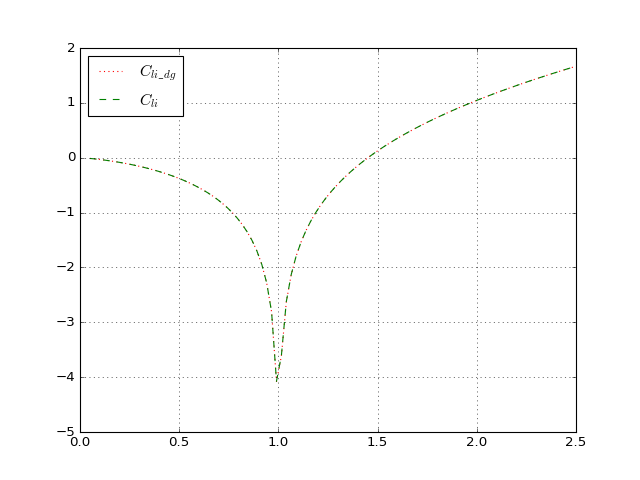

<IPython.core.display.Javascript object>


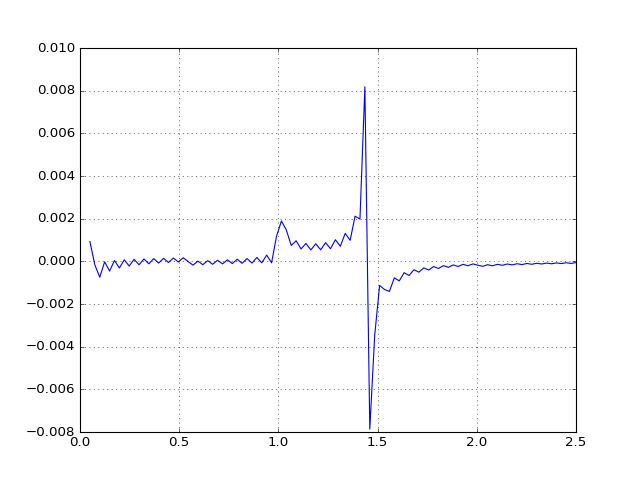

<IPython.core.display.Javascript object>


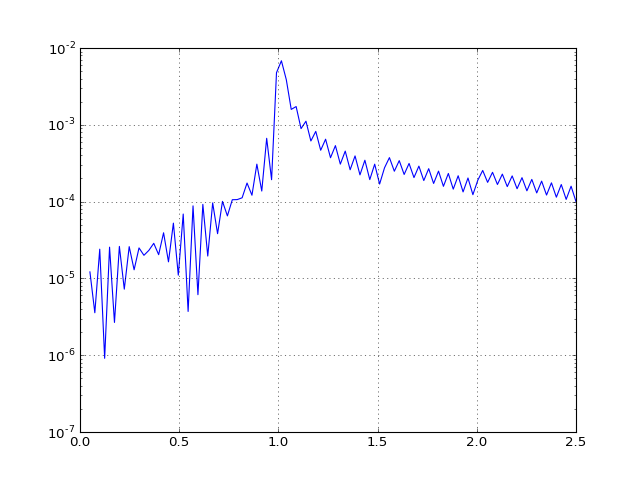

In [28]:
X=np.linspace(0.05,2.5,100)
Ydg=[li_dg(x,1e-4) for x in X]

plt.figure("tracé de li_dg")
plt.grid(True)
plt.plot(X,Ydg,":r",label=r'$C_{li\_dg}$')
plt.plot(X,Yth,"--g",label=r'$C_{li}$')
plt.legend(loc='upper left')
plt.show()

Reldg=[(Ydg[i]-Yth[i])/Yth[i] for i in range(len(Yth))]
plt.figure("tracé de l'erreur relative pour li_dg")
plt.grid(True)
plt.plot(X,Reldg)
plt.show()

Absdg=[abs(Ydg[i]-Yth[i]) for i in range(len(Yth))]
plt.figure("tracé de l'erreur absolue pour li_dg")
plt.grid(True)
plt.yscale("log")
plt.plot(X,Absdg)
plt.show()

C'est effectivement bien meilleur !

### Q24

In [29]:
def li_dev(x):
    if x<=1 or log(x)>40:
        return False
    else:
        MAXIT=100
        gamma=0.577215664901 # on n'a pas besoin en réalité de tant de précision vus atol et rtol
        y=log(x) # attention, on calcule Ei(log(x))
        k=1
        E=gamma+log(y) # pour stocker Ei_{k-1}
        F=E+y # pour stocker Ei_k
        puiss=y # pour ne pas recalculer les puissances de y à chaque itération
        facto=1 # pour calculer itérativement les factorielles
        while not(sont_proches(E,F)) and k<=MAXIT:
            k+=1
            puiss=puiss*y # c'est y**k
            facto=facto*k # c'est k!
            E,F=F,F+puiss/(k*facto)
        if k>MAXIT:
            return False
        else:
            return F        

On peut superposer le tracé des courbes représentatives de li, li_d et li_dev :

<IPython.core.display.Javascript object>


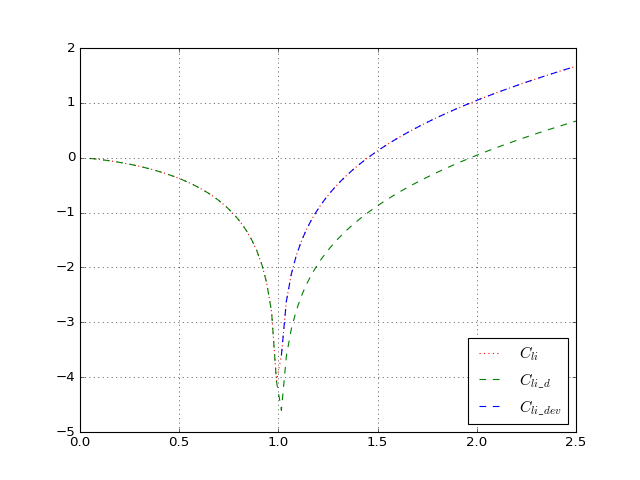

In [30]:
Xdev=[x for x in X if x>1]
Ydev=[li_dev(x) for x in X if x>1]

plt.figure("Comparaison des 3 méthodes")
plt.grid(True)
plt.plot(X,Yth,":r",label=r'$C_{li}$')
plt.plot(X,Y,"--g",label=r'$C_{li\_d}$')
plt.plot(Xdev,Ydev,"--b",label=r'$C_{li\_dev}$')
plt.legend(loc='lower right')

plt.show()

Les erreurs relatives :

<IPython.core.display.Javascript object>


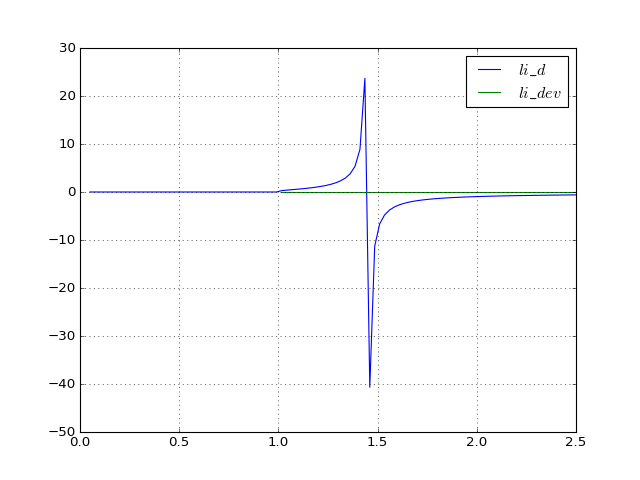

In [31]:
Reldev=[(li_dev(x)-li(x))/li(x) for x in Xdev]

plt.figure("tracé des erreurs relatives")
plt.grid(True)
plt.plot(X,Reld,label=r'$li\_d$')
plt.plot(Xdev,Reldev,label=r'$li\_dev$')
plt.legend()
plt.show()

Les erreurs absolues :

<IPython.core.display.Javascript object>


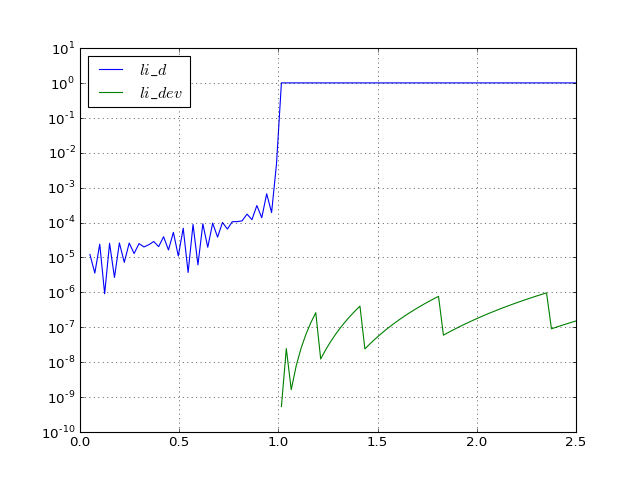

In [32]:
Absdev=[abs(li_dev(x)-li(x)) for x in Xdev]
plt.figure("tracé des erreurs absolues")

plt.grid(True)
plt.plot(X,Absd,label=r'$li\_d$')
plt.plot(Xdev,Absdev,label=r'$li\_dev$')
plt.yscale("log")
plt.legend(loc='upper left')
plt.show()

### Q25

Une clé primaire doit permettre d'identifier de manière unique un enregistrement (une "ligne") de la table. Ici, l'attribut nom ne le permet pas, puisque une même fonction peut avoir été testée plusieurs fois (dans l'exemple donné, la fonction li est testée sur les trois premiers enregistrements).

On utilisera plutôt id comme clé primaire.

### Q26

#### Requête 1 :

#### Requête 2 :

On peut aussi penser à NOTIN :

#### Requête 3 :